In [31]:
# import modules here
from prep_data import *
from visualizations import *
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [32]:
# data files
EXPERIMENT_1 = 'data/experiment1_data.csv'
EXPERIMENT_2 = 'data/experiment2_data.csv'

# Binary Models

## Experiment 1

In [33]:
# prepare the data
mode = 4 
x_train, x_test, y_train, y_test = binary_prep(EXPERIMENT_1, mode, seed=None)
class_names = ['1', '0'] # 1 means an app was opened, 0 means nothing happened

### Dummy Classifier

Let's see how accurate we are when we use a classifier that learns nothing...

             precision    recall  f1-score   support

          0       0.39      0.32      0.35        22
          1       0.32      0.39      0.35        18

avg / total       0.36      0.35      0.35        40



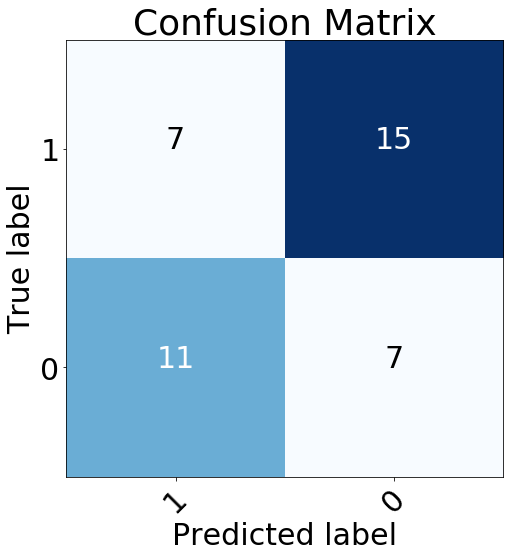

In [34]:
dummy = DummyClassifier()
dummy.fit(x_train, y_train)
# Make predictions
y_pred = dummy.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':30})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

It looks like the results are pretty bad...

### Support Vector Machine

In [35]:
# still need to do cross validation and grid search
svc = LinearSVC()
svc.fit(x_train, y_train)
joblib.dump(svc, 'saved_models/e1_binary_svm_m_' + str(mode) + '.pkl')

['saved_models/e1_binary_svm_m_4.pkl']

             precision    recall  f1-score   support

          0       1.00      0.41      0.58        22
          1       0.58      1.00      0.73        18

avg / total       0.81      0.68      0.65        40



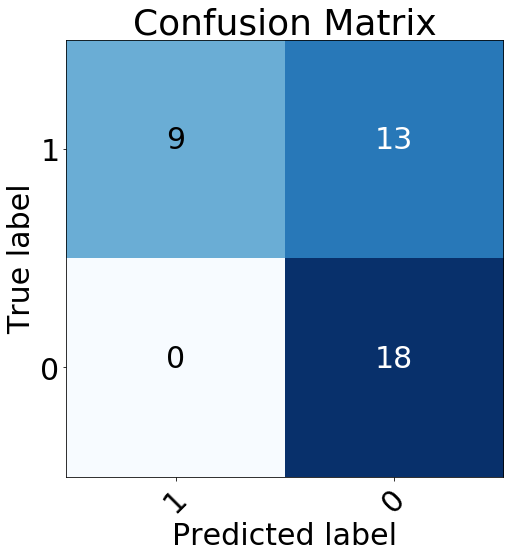

In [36]:
# Make predictions
y_pred = svc.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':30})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

### Logistic Regression

In [37]:
# still need to do cross validation and grid search
lr = LogisticRegression()
lr.fit(x_train, y_train)
joblib.dump(lr, 'saved_models/e1_binary_lr_m_' + str(mode) + '.pkl')

['saved_models/e1_binary_lr_m_4.pkl']

             precision    recall  f1-score   support

          0       0.89      0.73      0.80        22
          1       0.73      0.89      0.80        18

avg / total       0.82      0.80      0.80        40



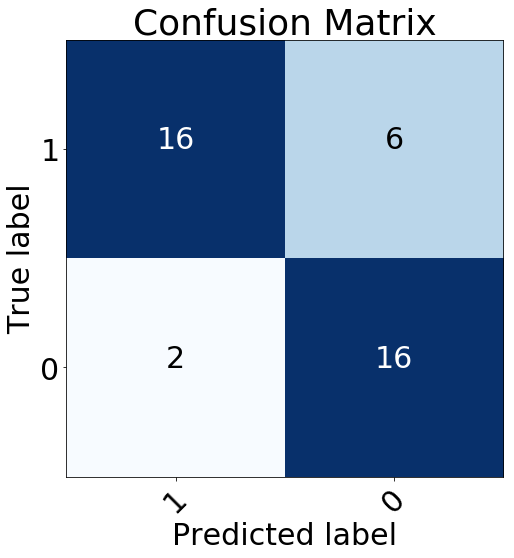

In [38]:
# Make predictions
y_pred = lr.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':30})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

### Random Forest

In [39]:
kFold = 5
param_grid = {'n_estimators': np.arange(10, 411, 100),
                'max_features': np.array(['sqrt', 'log2'])}
forest_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=kFold)

forest_grid.fit(x_train, y_train)
best_n = forest_grid.best_params_['n_estimators']
best_f = forest_grid.best_params_['max_features']

print("Best n estimators:    %f" % best_n)
print("Best max features:    %s" % best_f)

# rf = RandomForestClassifier()
# rf.fit(x_train, y_train)
joblib.dump(forest_grid, 'saved_models/e1_binary_rf_m_' + str(mode) + '.pkl')

Best n estimators:    310.000000
Best max features:    sqrt


['saved_models/e1_binary_rf_m_4.pkl']

             precision    recall  f1-score   support

          0       0.95      0.95      0.95        22
          1       0.94      0.94      0.94        18

avg / total       0.95      0.95      0.95        40



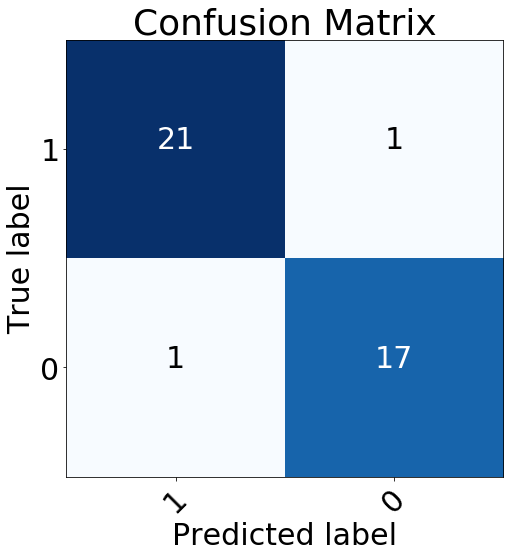

In [40]:
# Make predictions
y_pred = forest_grid.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':30})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

In [41]:
# I want to save these results to a txt file so I can view later
of_name = 'model_results/e1_binary_rf_m_' + str(mode) + '.txt'
of = open(of_name, 'w')

of.write("Results of Grid Search:\n")
of.write("\tBest n estimators:      %f\n" % best_n)
of.write("\tBest max features:      %s\n" % best_f)
of.write("\t---\n")
of.write("\tBest Score:           %f\n\n" % forest_grid.best_score_)
of.write("Results on Test Data:\n")
of.write("\tScore:                %f\n" % forest_grid.score(x_test, y_test))

of.close()

## Experiment 2

In [42]:
# prepare the data
mode = 4 
x_train, x_test, y_train, y_test = binary_prep(EXPERIMENT_2, mode, seed=None)
class_names = ['1', '0'] # 1 means an app was opened, 0 means nothing happened

### Dummy Classifier

             precision    recall  f1-score   support

          0       0.51      0.40      0.45        83
          1       0.43      0.54      0.47        69

avg / total       0.47      0.46      0.46       152



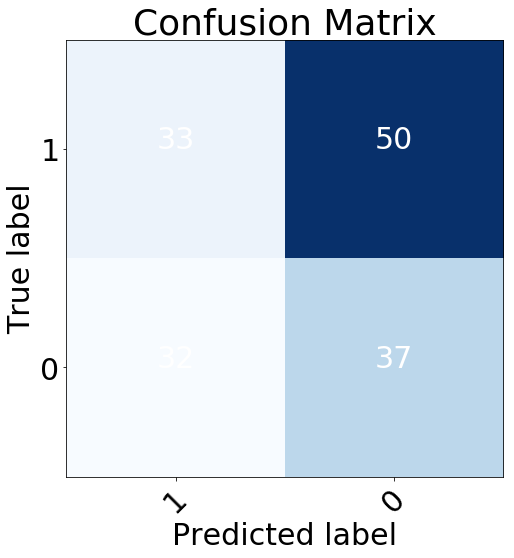

In [43]:
dummy = DummyClassifier()
dummy.fit(x_train, y_train)
# Make predictions
y_pred = dummy.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':30})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

### Support Vector Machine

In [44]:
# still need to do cross validation and grid search
svc = LinearSVC()
svc.fit(x_train, y_train)
joblib.dump(svc, 'saved_models/e2_binary_svm_m_' + str(mode) + '.pkl')

['saved_models/e2_binary_svm_m_4.pkl']

             precision    recall  f1-score   support

          0       0.71      0.60      0.65        83
          1       0.60      0.71      0.65        69

avg / total       0.66      0.65      0.65       152



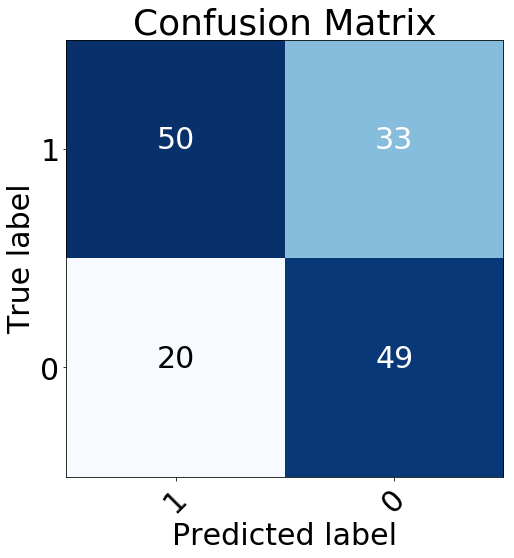

In [45]:
# Make predictions
y_pred = svc.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':30})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

### Logistic Regression

In [46]:
# still need to do cross validation and grid search
lr = LogisticRegression()
lr.fit(x_train, y_train)
joblib.dump(lr, 'saved_models/e2_binary_lr_m_' + str(mode) + '.pkl')

['saved_models/e2_binary_lr_m_4.pkl']

             precision    recall  f1-score   support

          0       0.71      0.95      0.81        83
          1       0.90      0.54      0.67        69

avg / total       0.80      0.76      0.75       152



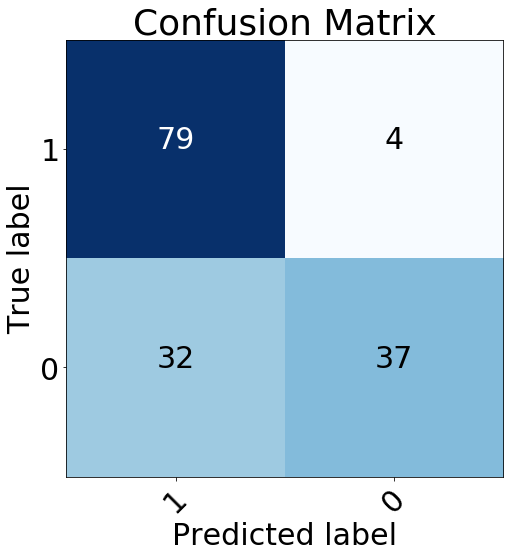

In [47]:
# Make predictions
y_pred = lr.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':30})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

### Random Forest

In [48]:
kFold = 5
param_grid = {'n_estimators': np.arange(10, 411, 100),
                'max_features': np.array(['sqrt', 'log2'])}
forest_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=kFold)

forest_grid.fit(x_train, y_train)
best_n = forest_grid.best_params_['n_estimators']
best_f = forest_grid.best_params_['max_features']

print("Best n estimators:    %f" % best_n)
print("Best max features:    %s" % best_f)

# rf = RandomForestClassifier()
# rf.fit(x_train, y_train)
joblib.dump(forest_grid, 'saved_models/e2_binary_rf_m_' + str(mode) + '.pkl')

Best n estimators:    10.000000
Best max features:    sqrt


['saved_models/e2_binary_rf_m_4.pkl']

             precision    recall  f1-score   support

          0       0.76      0.88      0.82        83
          1       0.82      0.67      0.74        69

avg / total       0.79      0.78      0.78       152



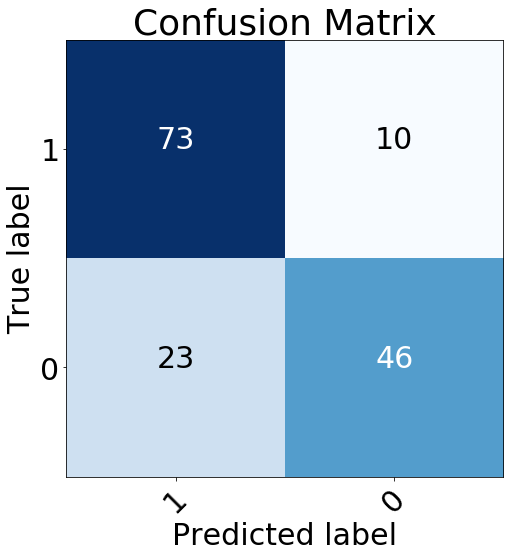

In [49]:
# Make predictions
y_pred = forest_grid.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':30})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

In [50]:
# I want to save these results to a txt file so I can view later
of_name = 'model_results/e2_binary_rf_m_' + str(mode) + '.txt'
of = open(of_name, 'w')

of.write("Results of Grid Search:\n")
of.write("\tBest n estimators:      %f\n" % best_n)
of.write("\tBest max features:      %s\n" % best_f)
of.write("\t---\n")
of.write("\tBest Score:           %f\n\n" % forest_grid.best_score_)
of.write("Results on Test Data:\n")
of.write("\tScore:                %f\n" % forest_grid.score(x_test, y_test))

of.close()